# Clustering

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from IPython.display import Image, display

from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image

from tqdm import tqdm
import random as random
import time 
from sklearn.ensemble import RandomForestClassifier
from kmeans import *
from sklearn.datasets.samples_generator import make_blobs

import random

/Users/Evan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# K-means algorithm

K-means is an unsupervised algorithm (no labels) that aims to find clusters that minimze variance within each cluster or group of datapoints. Essentially, the k-means algorithm groups data-points that are close to each other in feature space effectively creating our own labels. 

1) Choose k points from the dataset as initial centroids. <br>
2) For each data-point, assign it to the closest centroid/ <br>
3) **Recalculate Centroids:** Find the center of mass of all the points. <br>
4) Repeat steps 2 and 3 until the set of point for each cluster do not change

However, the k-means algorithm has some inherent issues. We will go through the issues and solutions to the
### **Issue 1**: Choosing appropriate number of clusters.
**Solution:** Elbow method - We run the k-means for the a range of values. As we increase k, the sum of Euclidean distances of each point in the cluster grows smaller. 
This makes sense because if we have a set of 100 unique data points and we select k = 100, then each datapoint would be its own cluster and would have a distance of 0.

### **Issue 2**: Stuck on local minimum due to dependence of initial values
Because the centroids are selected at random from the data-points, it is possible that the original "seeds" are bad and become stuck at a local minima. <br>
**Solution**: K-means++ algorithm

### **Issue 3**: different clustering density and sizes
K-means has trouble clustering data when the clusters have varying sizes. Due to the Euclidean distance calculation, the underlying assumption is that the shape of clusters are "round/spherical". Therefore, k-means performs best when the clusters are chracterized of being equally sized, equally dense, and devoid of outliers. <br>
**Solution**: Density-Based K-means algorithm (DBSCAN). This algorithm is available in the Scikit-Learn package

### **Issue 4:** Scaling with higher dimmensions
If our dataset has many features, calculating the distance of each point to the cluster centroids becomes extremely expensive
**Solutuion** Spectral Clustering adds a pre-clustering step to the algorithm


## **Implications**: K-means is not a 1-stop shop solution for all problems. 



# Test on array of 1-D numberes

In [2]:
%run kmeans

grades = np.array([92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86,
         85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]).reshape(-1,1)

k = 3
centroids, labels = kmeans(grades, k)
print('labels for each x:', labels)
for j in range(k):
    print('vector assignments:', np.array(grades[labels==j]).reshape(1,-1).flatten())
    

ITERATION: 0
ITERATION: 1
COMPARISON: -0.02315910620569555
labels for each x: [0 0 1 2 0 0 0 1 0 2 0 0 2 2 2 0]
vector assignments: [92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]
vector assignments: [74.06 80.65]
vector assignments: [86.94 85.94 85.37 87.85 87.71]


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
centroids, labels = kmeans(X, k=2, centroids='kmeans++', tolerance=0.01)
confusion_matrix(y, labels)

SELECTING STARTING CENTROIDS ITERATION: 0
ITERATION: 0
ITERATION: 1
COMPARISON: -35.465864466326344
ITERATION: 2
COMPARISON: 26.92741792017872
ITERATION: 3
COMPARISON: 8.195842096460304
ITERATION: 4
COMPARISON: 2.8090805015264673
ITERATION: 5
COMPARISON: 0.7452926135464237
ITERATION: 6
COMPARISON: -1.114510229338917
ITERATION: 7
COMPARISON: -0.9693106579816811
ITERATION: 8
COMPARISON: 1.1324392153240224
ITERATION: 9
COMPARISON: -0.5710914430695024
ITERATION: 10
COMPARISON: 0.0


array([[ 37, 175],
       [344,  13]])

# Clustering on 2-D data

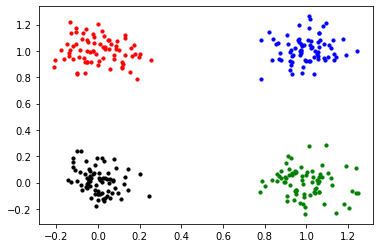

In [15]:
# Make random cluster dataset
centers = [(0, 1), (1, 1), (1,0), (0, 0)]
cluster_std = [0.1, 0.1, 0.1, 0.1]
X, y = make_blobs(n_samples=300, cluster_std=cluster_std, centers=centers, n_features=2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")
plt.scatter(X[y == 3, 0], X[y == 3, 1], color="black", s=10, label="Cluster4")

ITERATION: 0
ITERATION: 1
COMPARISON: -2.618009963495688
ITERATION: 2
COMPARISON: -0.003758868967978477


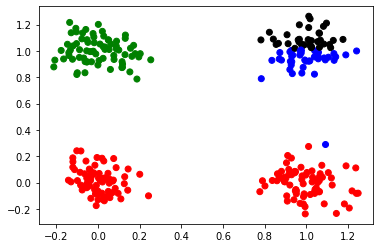

In [17]:
centroids, labels = kmeans(X, 4, centroids= None)
colors=np.array(['red','blue', 'green', 'black'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()


#### **K-means failure**: The image shown above shows when clustering fails due to bad seeding. The solution is to use k-means ++
The sklearn *make circles* function creates data points that show a small circle within a larger circle when plotted. 


# **K-means++ algorithm**

To solve the local minimum issue, k-means++ was developed to strategically select starting points for the k-means-clustering algorithm. This algorithm is relatively new (first proposed in 2007). The advantage of K-means++ is thatit it prevents the k-means algorithm from choosing sub-optimal clusters (as k clusters are chosen at random). 

###  Algorithm Goal: Choose the data point that maximizes the minimum distance from other centroids
Step 1) choose a centroid at random from the data points <br>
Step 2) For all other datapoints compute the Euclidean distance from the closest centroid. <br>
Step 3) **Iterative Cluster Selection:** Choose the point that **maximizes the distance from the closest cluster**. Repeat this step until **k** clusters have been chosen. <br>
Step 4) Proceed with normal k-means


###  **K-means++ drawbacks**: running times can be long
**Step 2** in the algorithm is computationally expensive with large amounts of data-points as we have to calculate the distances for each data-point to the closest cluster. As we increase the number of k, the algorithm requires you to calculate distances of each data point ot each cluster.

## The graph constructed below shows when **kmeans++** algorithm is used which prevents bad seeding

SELECTING STARTING CENTROIDS ITERATION: 0
SELECTING STARTING CENTROIDS ITERATION: 1
SELECTING STARTING CENTROIDS ITERATION: 2
ITERATION: 0
ITERATION: 1
COMPARISON: -4.573766356285906
ITERATION: 2
COMPARISON: 0.0
[[ 1.42097940e-03  1.00113840e+00]
 [ 9.95789151e-01 -9.87646195e-04]
 [ 1.69423380e-03  1.50070576e-02]
 [ 9.97720122e-01  1.01208215e+00]]


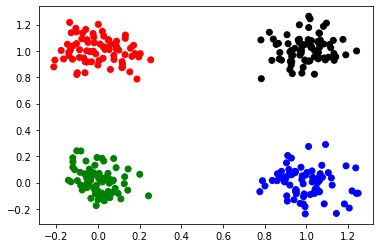

In [31]:
centroids, labels = kmeans(X, 4, centroids= 'kmeans++')
colors=np.array(['red','blue', 'green', 'black'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
print(centroids)
plt.show()

# Spectral Clustering: Avoiding the curse of dimmensionality

Spectral Clustering avoids the curse of dimmensionality by adding a pre-clustering step by doing the following steps. <br>

1) PCA to the dataset to reduce dimmensionality. <br>
2) Project datapoints into the lower-dimmensionality space. <br>
3) Cluster

SELECTING STARTING CENTROIDS ITERATION: 0
SELECTING STARTING CENTROIDS ITERATION: 1
ITERATION: 0
ITERATION: 1
COMPARISON: -3.733040164146586
ITERATION: 2
COMPARISON: 0.06942620429455124
ITERATION: 3
COMPARISON: 0.11772279424294187
ITERATION: 4
COMPARISON: 0.16647150340054026
ITERATION: 5
COMPARISON: 0.17853424340042723
ITERATION: 6
COMPARISON: 0.14144696364502843
ITERATION: 7
COMPARISON: 0.042607915130429067
ITERATION: 8
COMPARISON: 0.02481760016926131


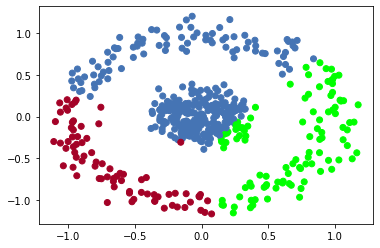

In [34]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 3, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227', '#00ff00'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

# Test on Black/White image using K-means++ algorithm

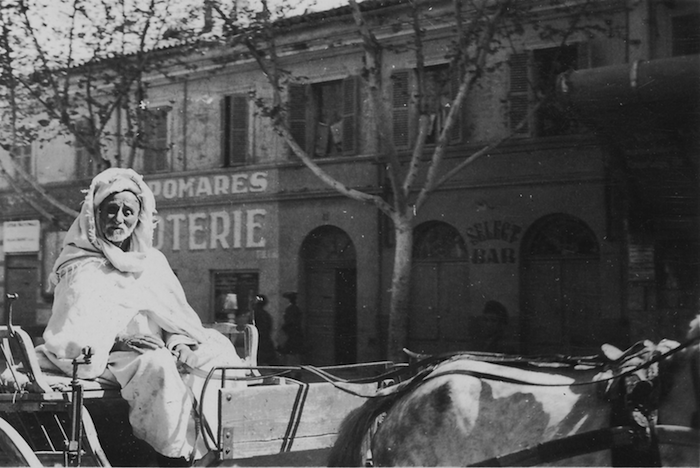

In [32]:
img = Image.open('north-africa-1940s-grey.png')
display(img)

## Compress image to only 4 colors (k = 4 clusters)
If there 1 data-point is moved to another cluster after recalculating the centroids, the algorithm will have to recluster the points.  <br>
Setting the tolerance to 0.01 gives us a benchmark to compare the previous set of centroids to the current one recalculated from taking the means through the following line of code: **np.sum(current_centroid - prev_centroid)/ prev_centroid** <br>
If the result is less than the tolerance, this means that the recalculation of centroids did not shift much.  <br>

### From the code below, we can see that the algorithm cuts off when the comparison of previous to current centroids is less 0.01

SELECTING STARTING CENTROIDS ITERATION: 0
SELECTING STARTING CENTROIDS ITERATION: 1
SELECTING STARTING CENTROIDS ITERATION: 2
ITERATION: 0
ITERATION: 1
COMPARISON: 4.5479242742179995
ITERATION: 2
COMPARISON: 0.5616824370846656
ITERATION: 3
COMPARISON: 0.5284090974626549
ITERATION: 4
COMPARISON: 0.475834814515562
ITERATION: 5
COMPARISON: 0.3492018714352792
ITERATION: 6
COMPARISON: 0.29256940784855756
ITERATION: 7
COMPARISON: 0.2156619071461215
ITERATION: 8
COMPARISON: 0.16914786511188476
ITERATION: 9
COMPARISON: 0.13200581511020232
ITERATION: 10
COMPARISON: 0.11072161366084929
ITERATION: 11
COMPARISON: 0.1052777217768053
ITERATION: 12
COMPARISON: 0.06919700964197648
ITERATION: 13
COMPARISON: 0.07625347350322065
ITERATION: 14
COMPARISON: 0.04882071014662401
ITERATION: 15
COMPARISON: 0.038222890798228965
ITERATION: 16
COMPARISON: 0.01646870728360311
ITERATION: 17
COMPARISON: 0.03221631358059367
ITERATION: 18
COMPARISON: 0.01549998976001603
ITERATION: 19
COMPARISON: 0.03180797852749537
ITE

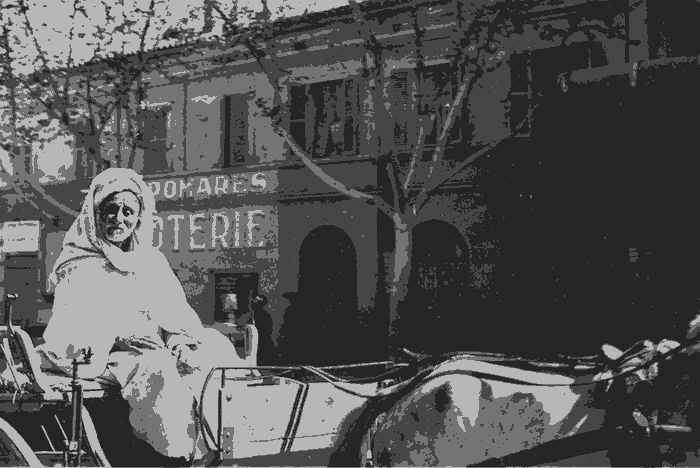

In [35]:
start = time.time()

k=4
img = Image.open('north-africa-1940s-grey.png')
X = np.asarray(img)
h, w = X.shape

image_2d = X.reshape((h*w, 1))
centroids, labels = kmeans(image_2d, k=k, centroids='kmeans++', tolerance=.01)
centroids = np.array(centroids)

centroids = centroids.astype(np.uint8)

# Cluster all the colors
X = centroids[labels]
img_ = Image.fromarray(X.reshape(h,w), 'L')
end = time.time()

print("TIME TAKEN:", end-start)
img_.show()
img_.save('1940_Grey_ECHEN.png')
display(img_)

# Compressing colored photo to only 32 colors

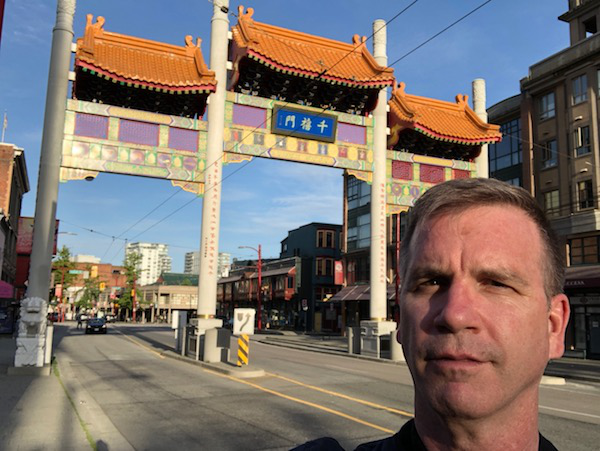

In [38]:
img = Image.open('parrt-vancouver.jpg')
display(img)

SELECTING STARTING CENTROIDS ITERATION: 0
SELECTING STARTING CENTROIDS ITERATION: 1
SELECTING STARTING CENTROIDS ITERATION: 2
SELECTING STARTING CENTROIDS ITERATION: 3
SELECTING STARTING CENTROIDS ITERATION: 4
SELECTING STARTING CENTROIDS ITERATION: 5
SELECTING STARTING CENTROIDS ITERATION: 6
SELECTING STARTING CENTROIDS ITERATION: 7
SELECTING STARTING CENTROIDS ITERATION: 8
SELECTING STARTING CENTROIDS ITERATION: 9
SELECTING STARTING CENTROIDS ITERATION: 10
SELECTING STARTING CENTROIDS ITERATION: 11
SELECTING STARTING CENTROIDS ITERATION: 12
SELECTING STARTING CENTROIDS ITERATION: 13
SELECTING STARTING CENTROIDS ITERATION: 14
SELECTING STARTING CENTROIDS ITERATION: 15
SELECTING STARTING CENTROIDS ITERATION: 16
SELECTING STARTING CENTROIDS ITERATION: 17
SELECTING STARTING CENTROIDS ITERATION: 18
SELECTING STARTING CENTROIDS ITERATION: 19
SELECTING STARTING CENTROIDS ITERATION: 20
SELECTING STARTING CENTROIDS ITERATION: 21
SELECTING STARTING CENTROIDS ITERATION: 22
SELECTING STARTING CE

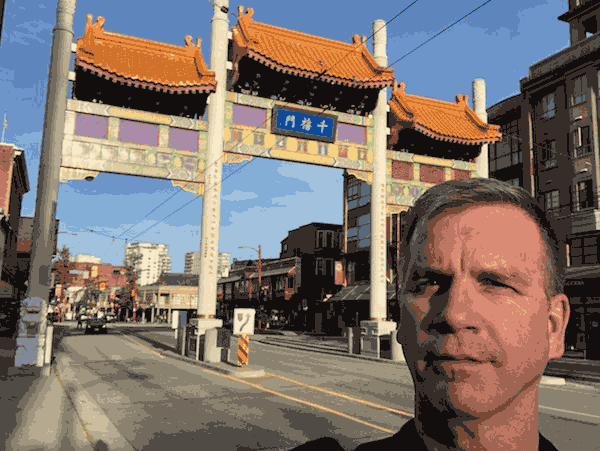

In [37]:
start = time.time()

k=32
img = Image.open('parrt-vancouver.jpg')
X = np.asarray(img)
start = time.time()
h, w, z = X.shape
image_2d = X.reshape((h*w, 3))

centroids, labels = kmeans(image_2d, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points

img_2 = Image.fromarray(X.reshape(h,w,z))

end = time.time()
print("TIME TAKEN:", end-start)
img_2.show()

img_2.save('RGB_compress_30mins.png')

display(img_2)